<a href="https://colab.research.google.com/github/Pappas313/Computational-vision/blob/main/%CE%A5%CF%80%CE%BF%CE%BB%CE%BF%CF%83%CF%84%CE%B9%CE%BA%CE%AE_%CE%8C%CF%81%CE%B1%CF%83%CE%B7_%CE%95%CF%81%CE%B3%CE%B1%CF%83%CE%AF%CE%B1_1_7_H.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Άσκηση 7, Ανίχνευση ακμών:**

Θεωρήστε τις εικόνες αποχρώσεων του γκρι (grayscale
image) “butterfly_g.jpg”, “cameraman.bmp” και “lenna.bmp”.

**Ζητούμενα:**


**Η.** Υπολογίστε για τις εικόνες “cameraman.bmp” και “lenna.bmp” τις ακμές με χρήση των μεθόδων που εφαρμόστηκαν στα βήματα (Α)-(Γ) και αξιολογήστε συγκριτικά την απόδοσή τους (παραθέστε μόνο τη βέλτιστη μάσκα ακμών για κάθε μέθοδο).

**Import libraries**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

**Apply the Roberts Cross Operator**

**Combine the gradients**

**Normalize the gradient magnitude to the range [0, 255]**

In [ ]:
def sobel_edge_detection(image):
    gradient_x = cv2.Sobel(image, cv2.CV_64F, 1, 0)
    gradient_y = cv2.Sobel(image, cv2.CV_64F, 0, 1)
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    normalized_gradient = (gradient_magnitude * 255 / gradient_magnitude.max()).astype(np.uint8)
    return normalized_gradient

def roberts_edge_detection(image):
    roberts_kernel_x = np.array([[1, 0], [0, -1]])
    roberts_kernel_y = np.array([[0, 1], [-1, 0]])
    # Apply the Roberts Cross Operator
    gradient_x = cv2.filter2D(image, cv2.CV_64F, roberts_kernel_x)
    gradient_y = cv2.filter2D(image, cv2.CV_64F, roberts_kernel_y)

    # Combine the gradients
    gradient_magnitude = np.sqrt(np.square(gradient_x) + np.square(gradient_y))

    # Normalize the gradient magnitude to the range [0, 255]
    normalized_gradient = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    return normalized_gradient

**Define Prewitt kernels**

**Convolve the image with the Prewitt kernels**

**Compute the magnitude of the gradient**

**Normalize the gradient magnitude to the range [0, 255]**

**Convert the result to 8-bit unsigned integer**

In [ ]:
def prewitt_edge_detection(image):
    # Define Prewitt kernels
    kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

    # Convolve the image with the Prewitt kernels
    gradient_x = cv2.filter2D(image, -1, kernel_x)
    gradient_y = cv2.filter2D(image, -1, kernel_y)

    # Compute the magnitude of the gradient
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

    # Normalize the gradient magnitude to the range [0, 255]
    gradient_magnitude = (gradient_magnitude / gradient_magnitude.max()) * 255

    # Convert the result to 8-bit unsigned integer
    gradient_magnitude = np.uint8(gradient_magnitude)

    return gradient_magnitude

**Initialize an array to store the results**

**Apply Kirsch masks and find the maximum response**

**Normalize the result to the range [0, 255]**

In [ ]:
def kirsch_edge_detection(image, masks):
    # Initialize an array to store the results
    result = np.zeros_like(image)

    # Apply Kirsch masks and find the maximum response
    for mask in masks:
        convolved = cv2.filter2D(image, cv2.CV_64F, mask)
        result = np.maximum(result, np.abs(convolved))

    # Normalize the result to the range [0, 255]
    result = ((result - np.min(result)) / (np.max(result) - np.min(result)) * 255).astype(np.uint8)

    return result

**LoG_filter**

In [ ]:
def LoG_filter(image, sigma):
    blurred = cv2.GaussianBlur(image, (0, 0), sigma)
    return cv2.Laplacian(blurred, cv2.CV_64F)


Mounted at /content/drive


**Import Images**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
image1 = cv2.imread("/content/drive/My Drive/Υπολογιστική όραση/Dataset_01/cameraman.bmp", cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread("/content/drive/My Drive/Υπολογιστική όραση/Dataset_01/lenna.bmp", cv2.IMREAD_GRAYSCALE)

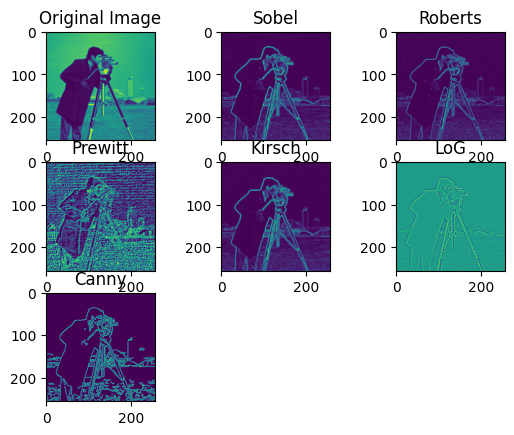

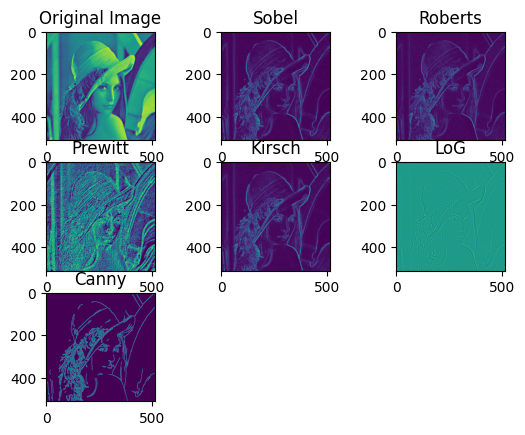

In [ ]:
kirsch_masks = [
    np.array([[-3, -3, 5], [-3, 0, 5], [-3, -3, 5]]),
    np.array([[-3, 5, 5], [-3, 0, 5], [-3, -3, -3]]),
    np.array([[5, 5, 5], [-3, 0, -3], [-3, -3, -3]]),
    np.array([[5, 5, -3], [5, 0, -3], [-3, -3, -3]]),
    np.array([[5, -3, -3], [5, 0, -3], [5, -3, -3]]),
    np.array([[-3, -3, -3], [5, 0, -3], [5, 5, -3]]),
    np.array([[-3, -3, -3], [-3, 0, -3], [5, 5, 5]]),
    np.array([[-3, -3, -3], [-3, 0, 5], [-3, 5, 5]])
]

sobel1 = sobel_edge_detection(image1)
roberts1 = roberts_edge_detection(image1)
prewitt1 = prewitt_edge_detection(image1)
kirsch1 = kirsch_edge_detection(image1, kirsch_masks)
log1 = LoG_filter(image1, 1)
canny1 = cv2.Canny(image1, 100, 200)

sobel2 = sobel_edge_detection(image2)
roberts2 = roberts_edge_detection(image2)
prewitt2 = prewitt_edge_detection(image2)
kirsch2 = kirsch_edge_detection(image2, kirsch_masks)
log2 = LoG_filter(image2, 1)
canny2 = cv2.Canny(image2, 100, 200)

plt.subplot(3, 3, 1)
plt.imshow(image1)
plt.title('Original Image')

plt.subplot(3, 3, 2)
plt.imshow(sobel1)
plt.title('Sobel')

plt.subplot(3, 3, 3)
plt.imshow(roberts1)
plt.title('Roberts')

plt.subplot(3, 3, 4)
plt.imshow(prewitt1)
plt.title('Prewitt')

plt.subplot(3, 3, 5)
plt.imshow(kirsch1)
plt.title('Kirsch')

plt.subplot(3, 3, 6)
plt.imshow(log1)
plt.title('LoG')

plt.subplot(3, 3, 7)
plt.imshow(canny1)
plt.title('Canny')

plt.show()

plt.subplot(3, 3, 1)
plt.imshow(image2)
plt.title('Original Image')

plt.subplot(3, 3, 2)
plt.imshow(sobel2)
plt.title('Sobel')

plt.subplot(3, 3, 3)
plt.imshow(roberts2)
plt.title('Roberts')

plt.subplot(3, 3, 4)
plt.imshow(prewitt2)
plt.title('Prewitt')

plt.subplot(3, 3, 5)
plt.imshow(kirsch2)
plt.title('Kirsch')

plt.subplot(3, 3, 6)
plt.imshow(log2)
plt.title('LoG')

plt.subplot(3, 3, 7)
plt.imshow(canny2)
plt.title('Canny')

plt.show()